In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"E:\quora insincere  data\train.csv")

In [3]:
df.columns

Index(['qid', 'question_text', 'target'], dtype='object')

In [4]:
df['target'].value_counts()


0    1225312
1      80810
Name: target, dtype: int64

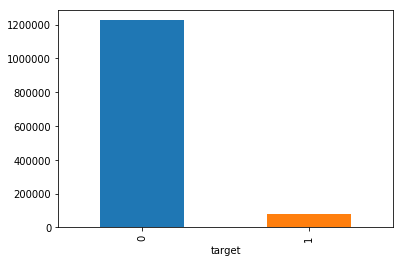

In [5]:
df.groupby("target")['qid'].count().plot.bar()


In [6]:
df[df['target']==1].head(8)

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1
119,00056d45a1ce63856fc6,Why do females find penises ugly?,1
127,0005de07b07a17046e27,How do I marry an American woman for a Green C...,1
144,00068875d7c82a5bcf88,Why do Europeans say they're the superior race...,1


In [7]:
df[df['target']==0].head(8)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
5,00004f9a462a357c33be,"Is Gaza slowly becoming Auschwitz, Dachau or T...",0
6,00005059a06ee19e11ad,Why does Quora automatically ban conservative ...,0
7,0000559f875832745e2e,Is it crazy if I wash or wipe my groceries off...,0


In [8]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)


Empty DataFrame
Columns: [qid, question_text, target]
Index: []


In [9]:
df["num_words"] = df["question_text"].apply(lambda x: len(str(x).split()))

In [10]:
df["num_words"] = df["question_text"].apply(lambda x: len(str(x).split()))

In [11]:
df['num_words'].max()

134

In [12]:
df['num_words'].min()

1

In [13]:
df['num_words'].median()

11.0

In [14]:
df['num_words'].mean()

12.803609463740754

In [15]:
df["num_unique_words"] = df["question_text"].apply(lambda x: len(set(str(x).split())))
df['num_unique_words'].mean()
df['num_unique_words'].median()


11.0

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
eng_stopwords = set(stopwords.words("english"))
df["num_stopwords"] = df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if
w in eng_stopwords]))

In [18]:
df['num_stopwords'].median()

5.0

In [19]:
df['num_stopwords'].mean()

6.16134557108754

### Number of Words, Stop Words and Unique Words

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


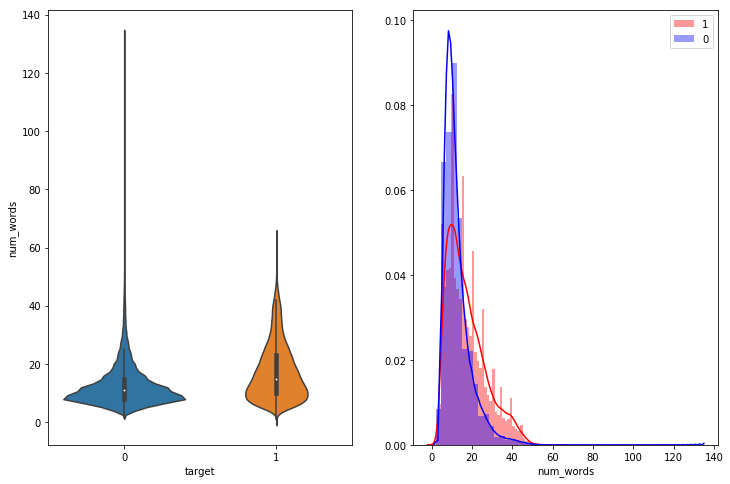

In [26]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'num_words', data = df[0:])
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1.0]['num_words'][0:] , label = "1", color = 'red')
sns.distplot(df[df['target'] == 0.0]['num_words'][0:] , label = "0" , color = 'blue' )
plt.legend()
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


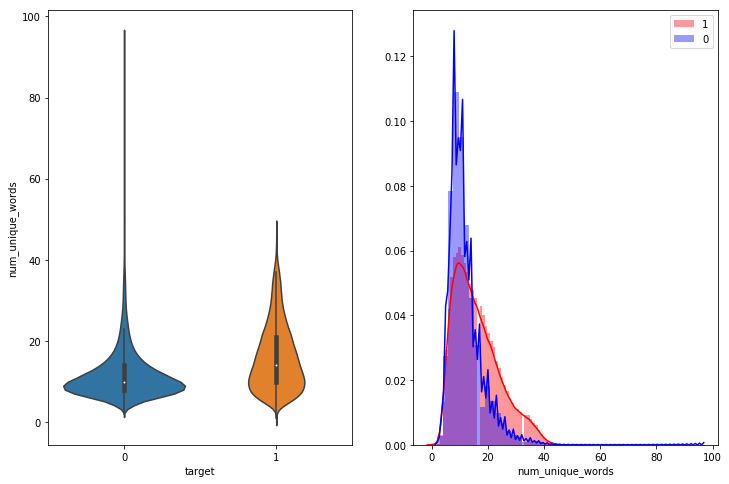

In [27]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'num_unique_words', data = df[0:])
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1.0]['num_unique_words'][0:] , label = "1", color = 'red')
sns.distplot(df[df['target'] == 0.0]['num_unique_words'][0:] , label = "0" , color = 'blue' )
plt.legend()
plt.show()

C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Cyborg\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


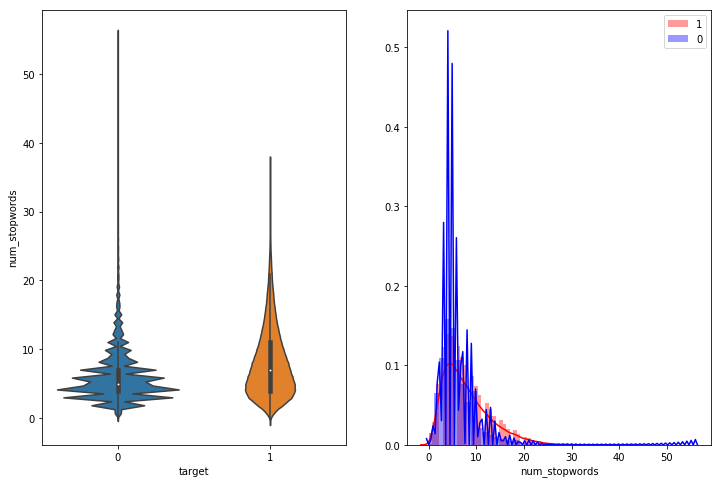

In [28]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'target', y = 'num_stopwords', data = df[0:])
plt.subplot(1,2,2)
sns.distplot(df[df['target'] == 1.0]['num_stopwords'][0:] , label = "1", color = 'red')
sns.distplot(df[df['target'] == 0.0]['num_stopwords'][0:] , label = "0" , color = 'blue' )
plt.legend()
plt.show()